In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Input Image

In [2]:
# Load Image
image = data.astronaut()  # or use data.camera(), data.chelsea(), etc.

In [6]:
image.shape

(512, 512, 3)

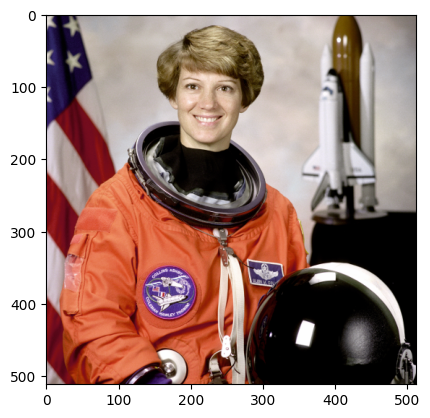

In [5]:
# Plot image (Input)
plt.imshow(image)
plt.show()

# Obtaining Patches

In [22]:
def extract_patches(image, patch_size=(64, 64), stride=None):
    """
    Extract MxN patches from a 2D (grayscale) or 3D (RGB) image.

    Args:
        image (np.ndarray): Input image of shape (H, W) or (H, W, C).
        patch_size (tuple): (M, N) size of each patch.
        stride (tuple): Stride between patches. If None, defaults to patch_size.

    Returns:
        patches (list of np.ndarray): List of patches with shape:
            - (M, N) for grayscale
            - (M, N, C) for RGB
    """
    if image.ndim not in [2, 3]:
        raise ValueError("Input image must be 2D (grayscale) or 3D (RGB)")

    M, N = patch_size
    H, W = image.shape[:2]

    if stride is None:
        stride = patch_size
    sH, sW = stride

    patches = []
    for i in range(0, H - M + 1, sH):
        for j in range(0, W - N + 1, sW):
            patch = image[i:i+M, j:j+N]
            if patch.shape[:2] == (M, N):
                patches.append(patch)

    return patches

In [52]:
# Obtaining Patches
patches = extract_patches(image[:,:,:], patch_size=(64, 64), stride=(4, 4))
n_patches = len(patches)
print(f"Number of patches: {n_patches}")

Number of patches: 12769


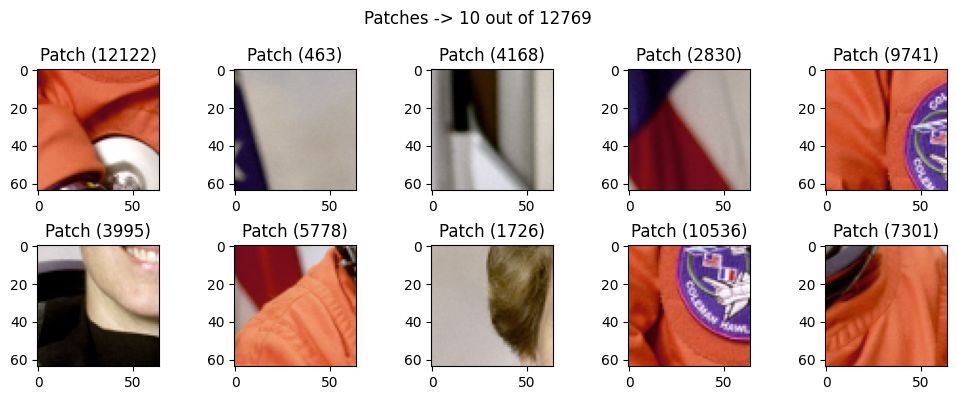

In [59]:
rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
fig.suptitle(f'Patches -> {rows*cols} out of {n_patches}')
for i in range(rows):
    for j in range(cols):
        #idx = i*cols+j # Sequential
        idx = np.random.randint(0, n_patches) # Random
        ax[i][j].imshow(patches[idx])
        ax[i][j].set_title(f"Patch ({idx})")
plt.tight_layout()
plt.show()